In [171]:
import numpy as np
import sys
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline 

data = pd.read_csv('./data/Ames_Housing_Price_Data.csv', index_col=0)
print(data.shape)
data.drop_duplicates(inplace=True)
print(data.shape)


(2580, 81)
(2579, 81)


In [172]:
print(data.nunique().head())

PID           2579
GrLivArea     1213
SalePrice      870
MSSubClass      16
MSZoning         7
dtype: int64


In [173]:
describe_df = data.describe(include='all')
describe_df.to_csv(r'describe_df.csv', index = True)
describe_df.head()

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2.579000e+03,2579.000000,2579.00000,2579.000000,2579,2117.000000,2579.000000,2579,168,2579,...,2579.000000,2579.00000,9,525,97,2579.000000,2579.000000,2579.000000,2579,2579
unique,NaN,NaN,NaN,NaN,7,NaN,NaN,2,2,4,...,NaN,NaN,4,4,4,NaN,NaN,NaN,10,6
top,NaN,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,...,NaN,NaN,TA,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,NaN,NaN,2007,NaN,NaN,2569,105,1640,...,NaN,NaN,3,301,88,NaN,NaN,NaN,2391,2413
mean,7.147546e+08,1485.950368,178053.44242,57.694843,NaN,68.510628,10119.269484,NaN,NaN,NaN,...,16.162854,1.66266,NaN,NaN,NaN,48.750291,6.152385,2007.839085,NaN,NaN


Length of these features:  43
Feature is:  Neighborhood
['SWISU' 'Edwards' 'IDOTRR' 'OldTown' 'NWAmes' 'Blmngtn' 'Mitchel'
 'NridgHt' 'NAmes' 'CollgCr' 'SawyerW' 'MeadowV' 'BrDale' 'Gilbert'
 'Timber' 'Somerst' 'BrkSide' 'NoRidge' 'Sawyer' 'Crawfor' 'Greens'
 'ClearCr' 'GrnHill' 'StoneBr' 'Veenker' 'NPkVill' 'Blueste' 'Landmrk']


C:\Users\pengu\Anaconda3\lib\site-packages\pandas\core\series.py:2829: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(result)


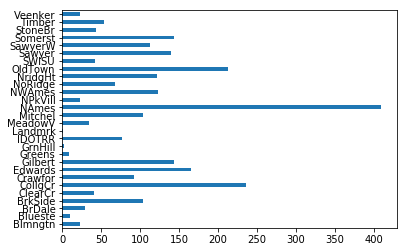

Feature is:  Exterior2nd
['Wd Sdng' 'HdBoard' 'MetalSd' 'VinylSd' 'Wd Shng' 'Plywood' 'Stucco'
 'CmentBd' 'AsbShng' 'ImStucc' 'BrkFace' 'Brk Cmn' 'CBlock' 'AsphShn'
 'Stone' 'PreCast']


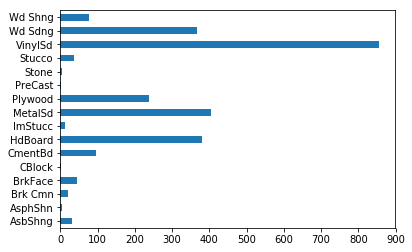

Feature is:  Exterior1st
['Wd Sdng' 'HdBoard' 'MetalSd' 'VinylSd' 'WdShing' 'Plywood' 'Stucco'
 'CemntBd' 'BrkFace' 'AsbShng' 'BrkComm' 'ImStucc' 'AsphShn' 'CBlock'
 'PreCast']


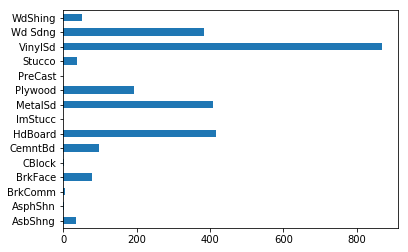

Feature is:  SaleType
['WD ' 'ConLD' 'New' 'Oth' 'ConLw' 'COD' 'CWD' 'Con' 'ConLI' 'VWD']


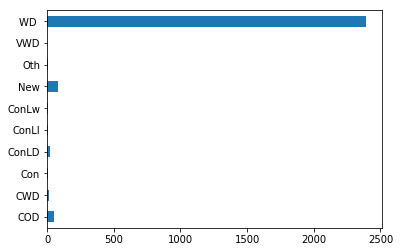

Feature is:  Condition1
['Norm' 'RRAn' 'PosN' 'Artery' 'RRAe' 'Feedr' 'PosA' 'RRNn' 'RRNe']


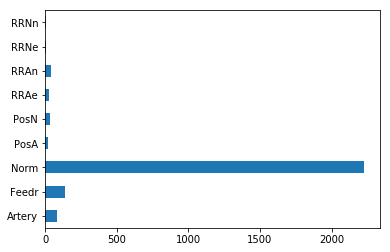

Feature is:  Condition2
['Norm' 'PosN' 'Feedr' 'Artery' 'PosA' 'RRNn' 'RRAn' 'RRAe']


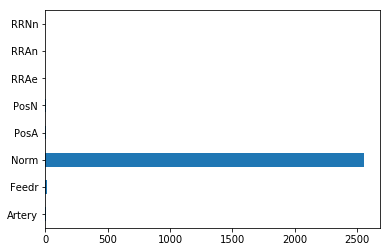

Feature is:  HouseStyle
['1Story' '2Story' 'SFoyer' 'SLvl' '1.5Fin' '2.5Unf' '1.5Unf' '2.5Fin']


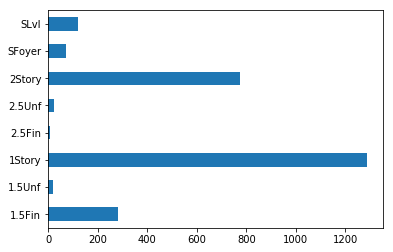

Feature is:  MSZoning
['RL' 'C (all)' 'RM' 'FV' 'RH' 'I (all)' 'A (agr)']


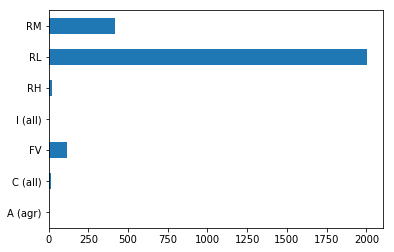

Feature is:  RoofMatl
['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl' 'Metal' 'Roll' 'Membran']


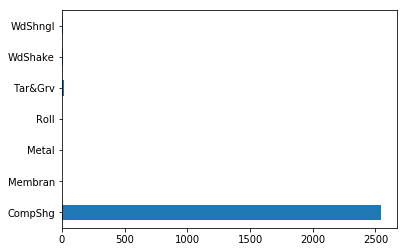

Feature is:  Functional
['Typ' 'Min2' 'Min1' 'Mod' 'Sal' 'Maj1' 'Maj2']


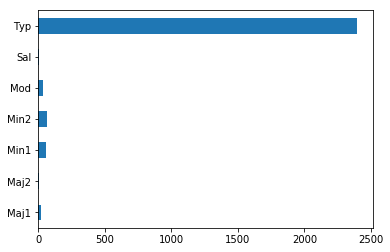

Feature is:  Heating
['GasA' 'GasW' 'Grav' 'Wall' 'OthW' 'Floor']


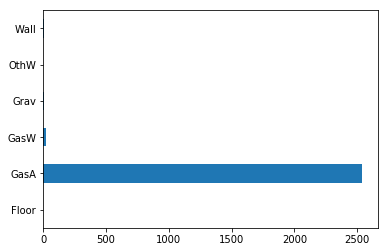

Feature is:  RoofStyle
['Gable' 'Hip' 'Mansard' 'Gambrel' 'Flat' 'Shed']


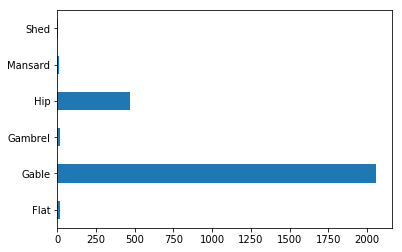

Feature is:  Foundation
['CBlock' 'BrkTil' 'PConc' 'Slab' 'Stone' 'Wood']


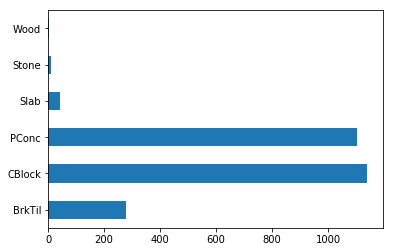

Feature is:  BsmtFinType1
['Rec' 'GLQ' 'ALQ' 'Unf' nan 'BLQ' 'LwQ']


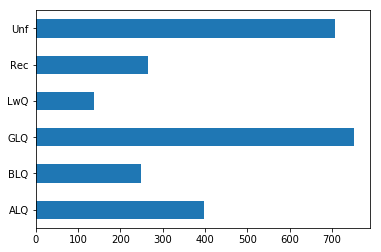

Feature is:  BsmtFinType2
['Unf' 'ALQ' nan 'GLQ' 'BLQ' 'LwQ' 'Rec']


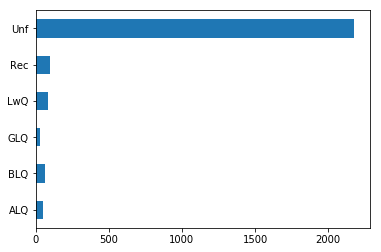

Feature is:  SaleCondition
['Normal' 'Partial' 'AdjLand' 'Abnorml' 'Alloca' 'Family']


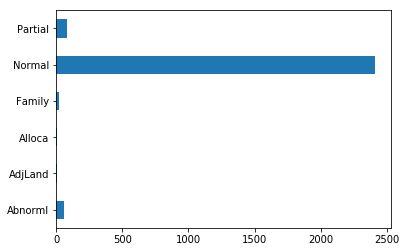

Feature is:  GarageType
['Detchd' 'Attchd' 'BuiltIn' 'Basment' nan '2Types' 'CarPort']


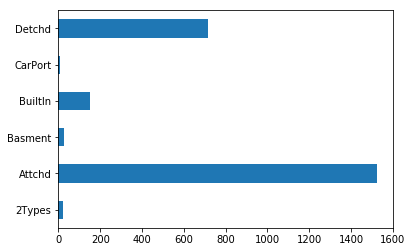

Feature is:  HeatingQC
['TA' 'Ex' 'Gd' 'Fa' 'Po']


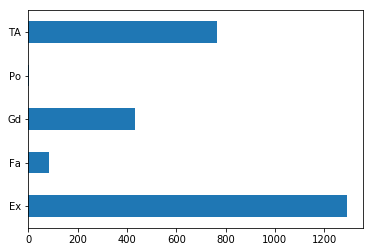

Feature is:  ExterCond
['TA' 'Gd' 'Fa' 'Ex' 'Po']


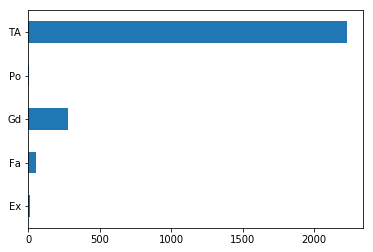

Feature is:  LotConfig
['Corner' 'Inside' 'FR2' 'CulDSac' 'FR3']


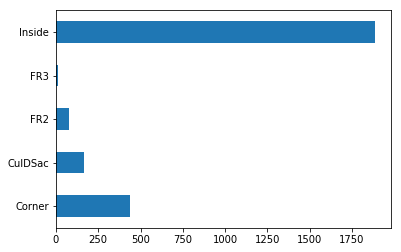

Feature is:  BldgType
['1Fam' 'TwnhsE' '2fmCon' 'Twnhs' 'Duplex']


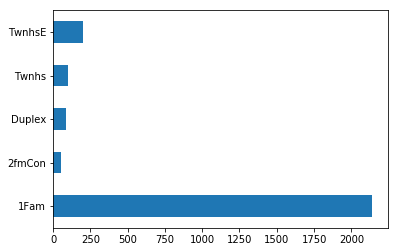

Feature is:  GarageQual
['TA' nan 'Fa' 'Gd' 'Po' 'Ex']


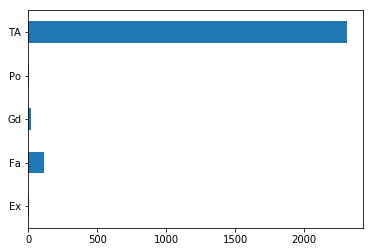

Feature is:  GarageCond
['TA' 'Po' nan 'Fa' 'Gd' 'Ex']


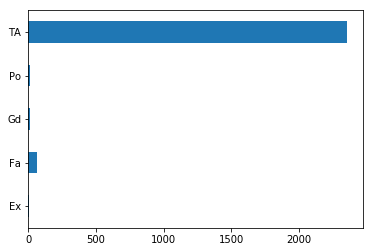

Feature is:  FireplaceQu
['Gd' nan 'Ex' 'TA' 'Fa' 'Po']


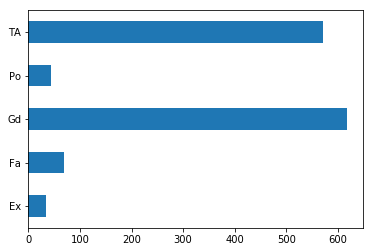

Feature is:  KitchenQual
['TA' 'Gd' 'Ex' 'Fa' 'Po']


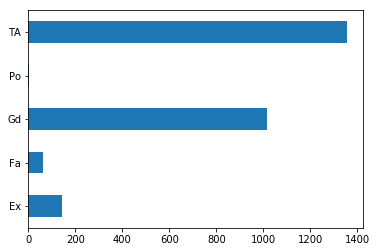

Feature is:  BsmtCond
['TA' nan 'Fa' 'Gd' 'Ex' 'Po']


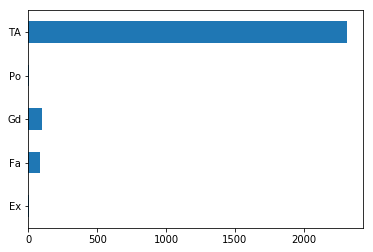

Feature is:  BsmtQual
['TA' 'Gd' 'Fa' nan 'Ex' 'Po']


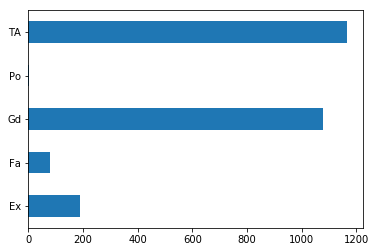

Feature is:  MasVnrType
['None' 'BrkFace' 'Stone' 'BrkCmn' nan]


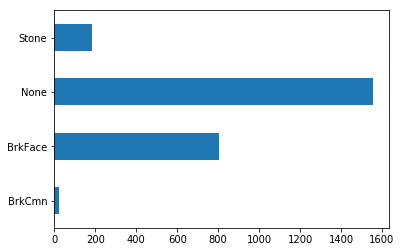

Feature is:  BsmtExposure
['No' 'Mn' nan 'Gd' 'Av']


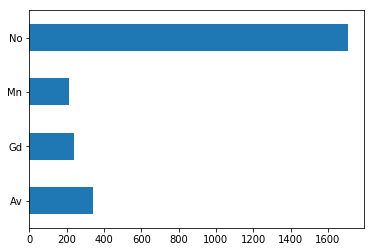

Feature is:  PoolQC
[nan 'Ex' 'Gd' 'Fa' 'TA']


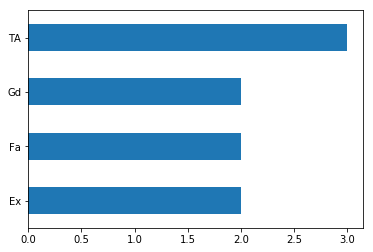

Feature is:  ExterQual
['TA' 'Gd' 'Fa' 'Ex']


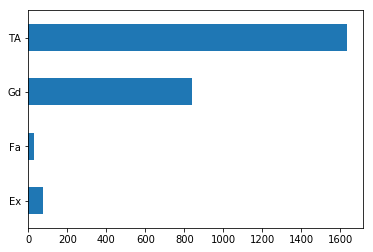

Feature is:  MiscFeature
[nan 'Shed' 'Othr' 'Gar2' 'TenC']


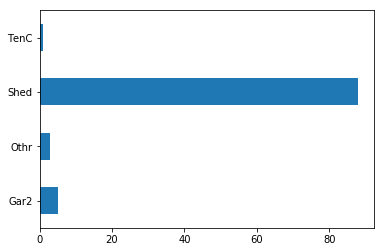

Feature is:  Electrical
['SBrkr' 'FuseF' 'FuseA' 'FuseP' nan]


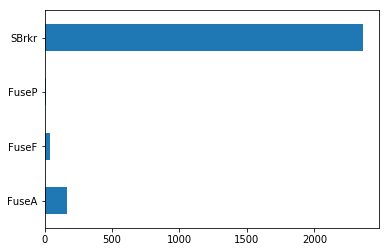

Feature is:  LandContour
['Lvl' 'Bnk' 'HLS' 'Low']


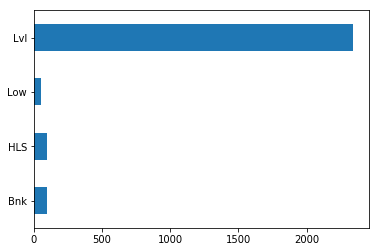

Feature is:  LotShape
['Reg' 'IR1' 'IR3' 'IR2']


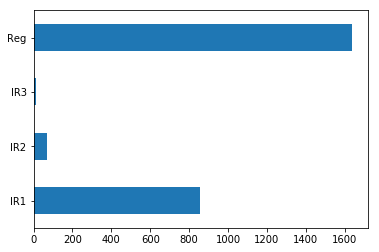

Feature is:  Fence
[nan 'GdWo' 'MnPrv' 'GdPrv' 'MnWw']


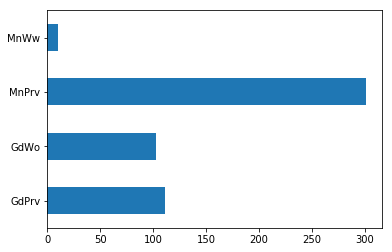

Feature is:  GarageFinish
['Unf' 'Fin' 'RFn' nan]


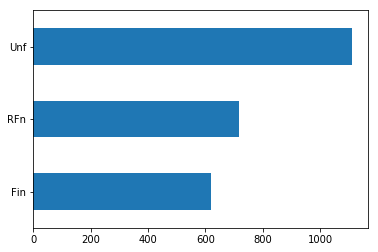

Feature is:  PavedDrive
['Y' 'N' 'P']


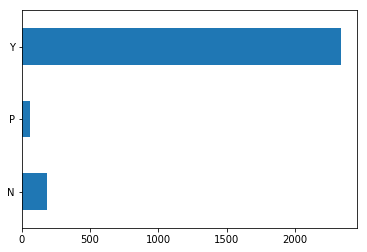

Feature is:  LandSlope
['Gtl' 'Mod' 'Sev']


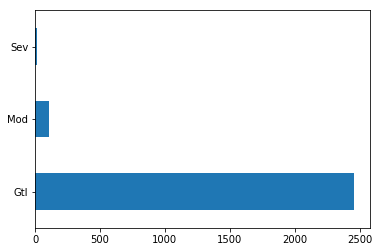

Feature is:  CentralAir
['Y' 'N']


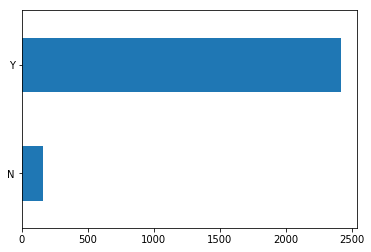

Feature is:  Utilities
['AllPub' 'NoSewr']


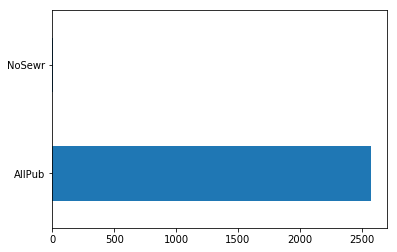

Feature is:  Alley
[nan 'Pave' 'Grvl']


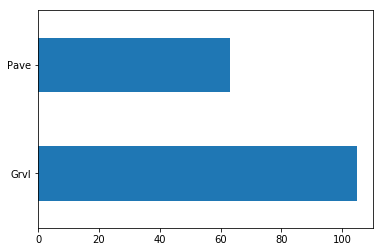

Feature is:  Street
['Pave' 'Grvl']


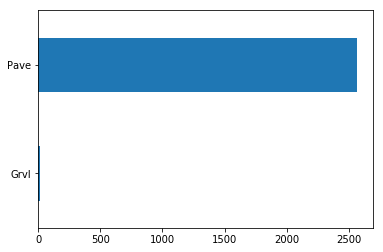

In [178]:
#get all columns with unique values
unique_s = describe_df.iloc[1, :]
unique_s.sort_values(inplace=True, ascending=False)
feat_uniq = unique_s[unique_s >= 0].index

print("Length of these features: ", len(feat_uniq))
for col in feat_uniq:
    print("Feature is: ", col)
    print(data[col].unique())
    data[col].value_counts().sort_index().plot(kind='barh', rot=0)
    plt.show()



In [177]:
# Nixon features: BsmtCond, MiscFeature(?), Electrical(?), LandContour, PavedDrive(?), LandSlope(?), Utilities, Alley(?), Street
# Aleksey features: SaleType, Condition1, Condition2, RoofMatl, Functional, Heating, BsmtFinType2, SaleCondition, ExterCond, GarageQual
print(feat_uniq)

Index(['Neighborhood', 'Exterior2nd', 'Exterior1st', 'SaleType', 'Condition1',
       'Condition2', 'HouseStyle', 'MSZoning', 'RoofMatl', 'Functional',
       'Heating', 'RoofStyle', 'Foundation', 'BsmtFinType1', 'BsmtFinType2',
       'SaleCondition', 'GarageType', 'HeatingQC', 'ExterCond', 'LotConfig',
       'BldgType', 'GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual',
       'BsmtCond', 'BsmtQual', 'MasVnrType', 'BsmtExposure', 'PoolQC',
       'ExterQual', 'MiscFeature', 'Electrical', 'LandContour', 'LotShape',
       'Fence', 'GarageFinish', 'PavedDrive', 'LandSlope', 'CentralAir',
       'Utilities', 'Alley', 'Street'],
      dtype='object')


In [179]:
data["SalePricePerGLA"] = data["SalePrice"] / data["GrLivArea"]

al_features = ["SaleType", "Condition1", "Condition2", "RoofMatl","Functional", "Heating",
              "BsmtFinType2", "SaleCondition", "ExterCond", "GarageQual"]

SaleType: Type of sale
WD	Warranty Deed - Conventional
CWD	Warranty Deed - Cash
VWD	Warranty Deed - VA Loan
New	Home just constructed and sold
COD	Court Officer Deed/Estate
Con	Contract 15% Down payment regular terms
ConLw	Contract Low Down payment and low interest
ConLI	Contract Low Interest
ConLD	Contract Low Down
Oth	Other
          SaleType
SaleType          
COD             50
CWD             11
Con              5
ConLD           23
ConLI            7
ConLw            8
New             79
Oth              4
VWD              1
WD            2391
Original size:  (2579, 2)
After NAs dropped:  (2579, 2)


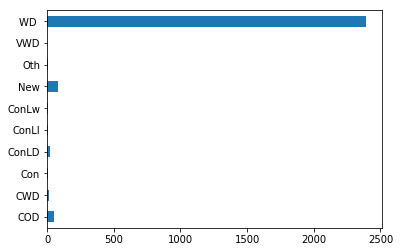

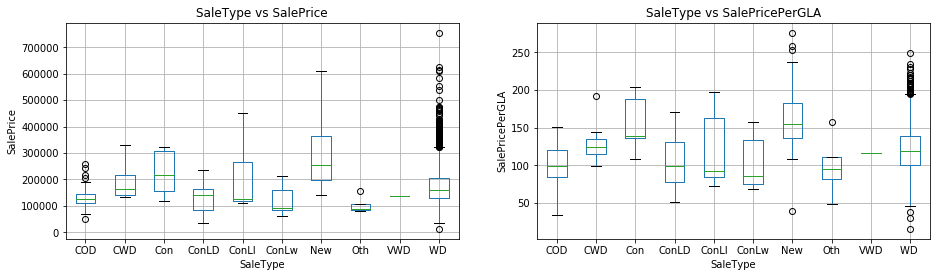

In [204]:
print("SaleType: Type of sale")
print("WD\tWarranty Deed - Conventional")
print("CWD\tWarranty Deed - Cash")
print("VWD\tWarranty Deed - VA Loan")
print("New\tHome just constructed and sold")
print("COD\tCourt Officer Deed/Estate")
print("Con\tContract 15% Down payment regular terms")
print("ConLw\tContract Low Down payment and low interest")
print("ConLI\tContract Low Interest")
print("ConLD\tContract Low Down")
print("Oth\tOther")

feature = al_features[0]
data[feature].value_counts().sort_index().plot(kind='barh', rot=0)

print(data[[feature,"SalePrice"]].dropna().groupby(by=feature,axis=0).agg({feature:"count"}))

print("Original size: ", data[[feature,"SalePrice"]].shape)
print("After NAs dropped: ", data[[feature,"SalePrice"]].dropna().shape)

fig, (ax1, ax2) = plt.subplots(1,2)
data[[feature,"SalePrice"]].dropna().boxplot(by=feature, ax=ax1)
ax1.set_title(feature+" vs SalePrice")
ax1.set_xlabel(feature)
ax1.set_ylabel("SalePrice")
data[[feature,"SalePricePerGLA"]].dropna().boxplot(by=feature, ax=ax2)
ax2.set_title(feature+" vs SalePricePerGLA")
ax2.set_xlabel(feature)
ax2.set_ylabel("SalePricePerGLA")
fig.set_figheight(4)
fig.set_figwidth(15)
plt.suptitle('')
plt.show()
